# Hierarchical Clustering

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TODO: 
- Studiare meglio i tagli e vedere poi con gli scatter plot 
- Rimuovere outlier delle feature utilizzate per il clustering

In [36]:
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import fcluster

import warnings
warnings.filterwarnings('ignore')

In [37]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv', dtype={'cyclist_team': str})
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
# Select relevant columns for clustering
columns_to_use = ['length', 'race_prestige', 'race_physical_effort']
dataset = dataset[columns_to_use].drop_duplicates()

### Races Clustering

In [38]:
data_for_clustering = dataset.dropna() #TODO: remove when we have imputed the missing values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

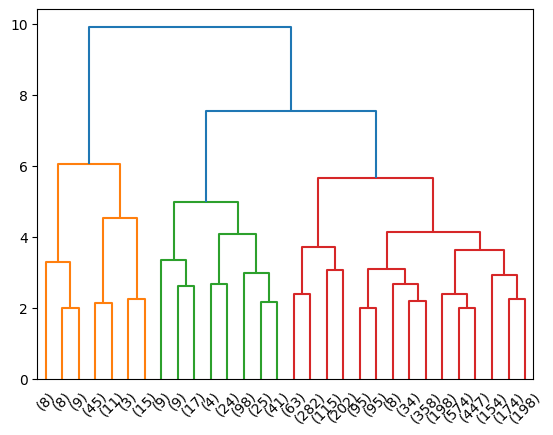

In [39]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [40]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.7467171629399835)

In [41]:
cluster_labels = fcluster(data_link, t=7.5, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.386369290450654)

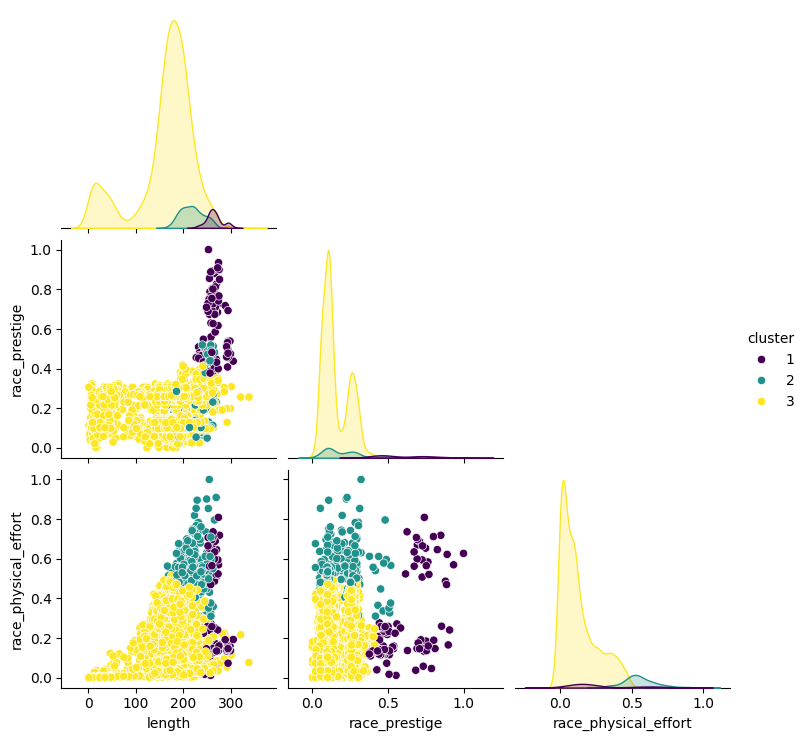

In [42]:
data_for_clustering['cluster'] = cluster_labels
sns.pairplot(data_for_clustering, hue='cluster', palette='viridis', corner=True)

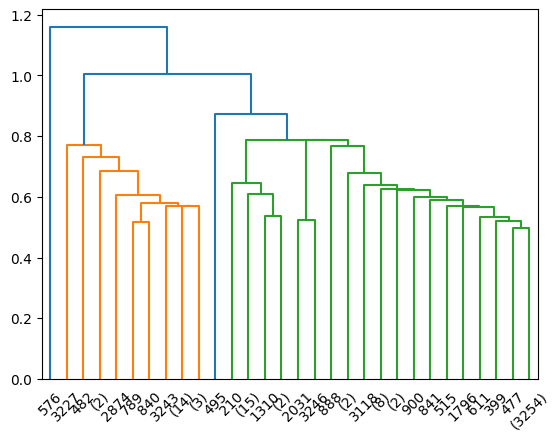

In [43]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [44]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.697550494067927)

In [45]:
cluster_labels = fcluster(data_link, t=0.7, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.2952341583678742)

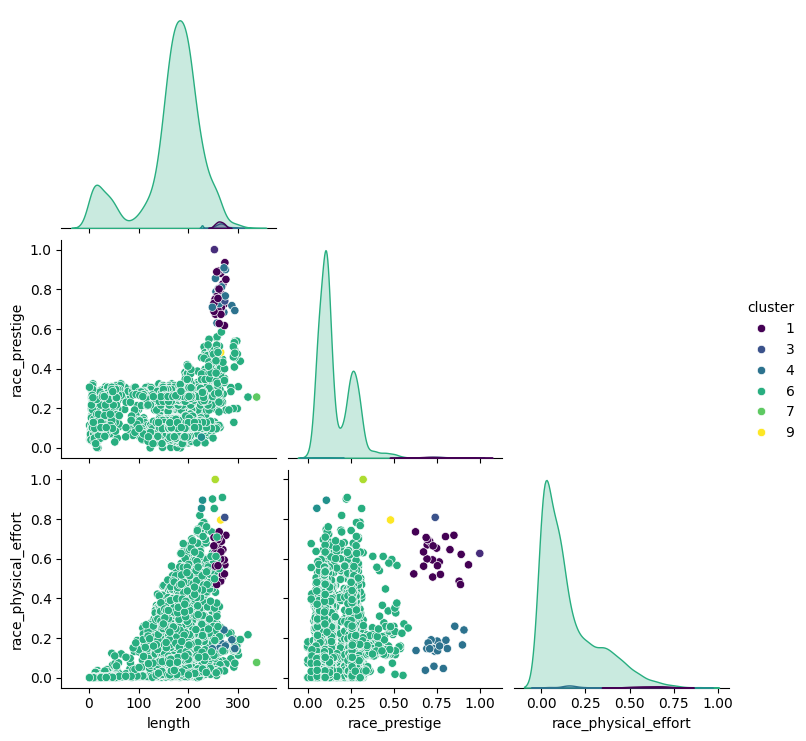

In [46]:
data_for_clustering['cluster'] = cluster_labels
sns.pairplot(data_for_clustering, hue='cluster', palette='viridis', corner=True)

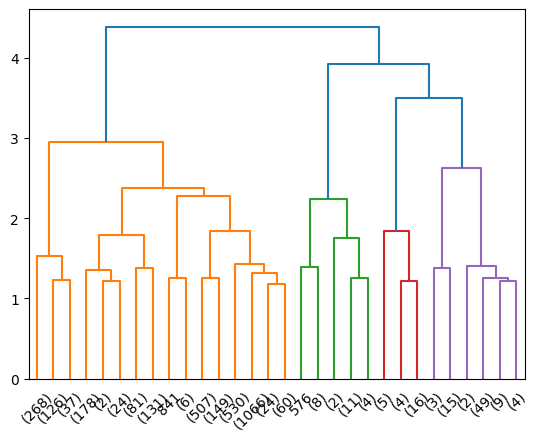

In [13]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [14]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.8076376340826145)

In [15]:
cluster_labels = fcluster(data_link, t=2.8, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.3904265242797588)

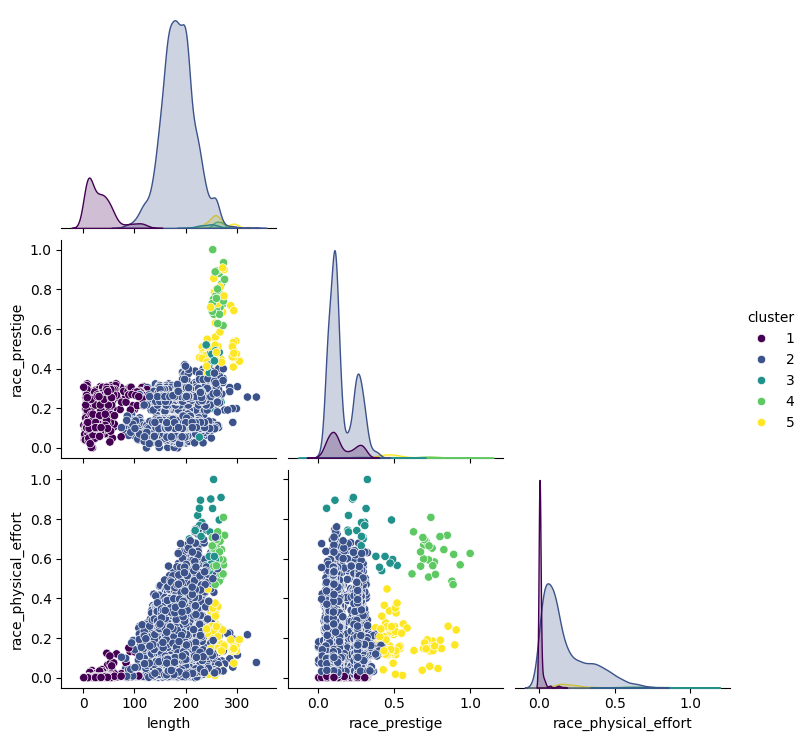

In [16]:
data_for_clustering['cluster'] = cluster_labels
sns.pairplot(data_for_clustering, hue='cluster', palette='viridis', corner=True)

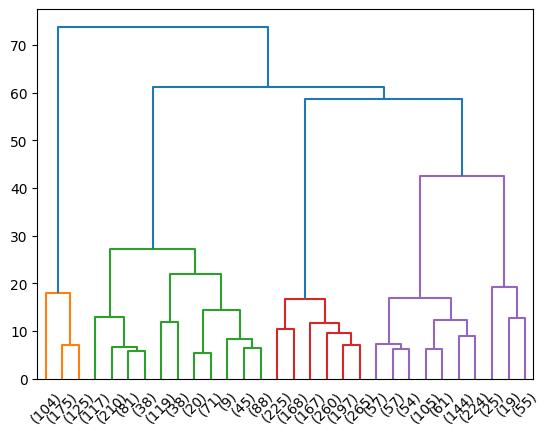

In [17]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [18]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.6074014267869482)

In [19]:
cluster_labels = fcluster(data_link, t=50, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.4078866237140772)

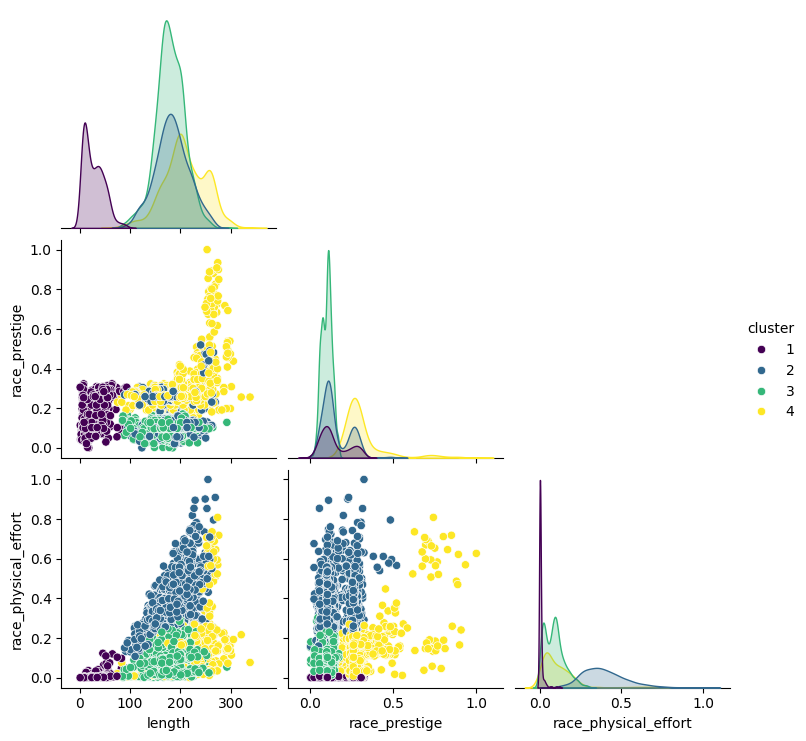

In [20]:
data_for_clustering['cluster'] = cluster_labels
sns.pairplot(data_for_clustering, hue='cluster', palette='viridis', corner=True)

### Races-Cyclist Clustering

In [21]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv', dtype={'cyclist_team': str})
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
dataset = dataset[dataset['race_name'] == 'Ronde van Vlaanderen']

In [22]:
# Select relevant columns for clustering
columns_to_use = ['length','race_prestige', 'race_physical_effort', 'cyclist_bmi', 'cyclist_age', 'height', 'cyclist_climb_power', 'position', 'delta']

data_for_clustering = dataset[columns_to_use].dropna() #TODO: remove when we have imputed the missing values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

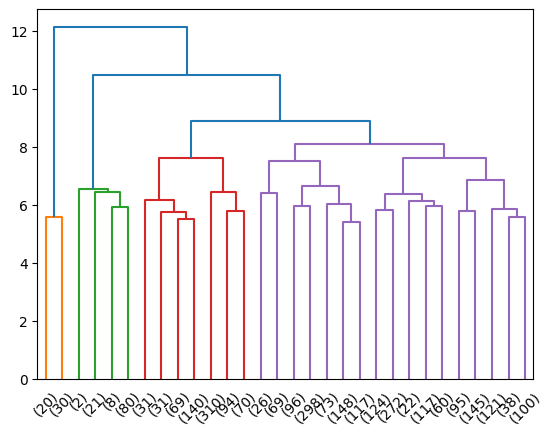

In [23]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [24]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.6415516319866896)

In [25]:
cluster_labels = fcluster(data_link, t=8.5, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.11701013166964418)

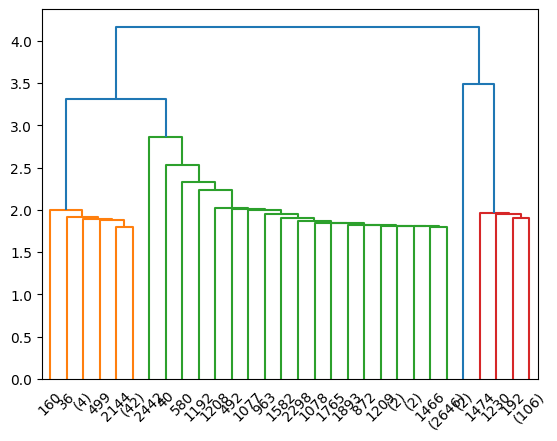

In [26]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [27]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.7428769792703652)

In [28]:
cluster_labels = fcluster(data_link, t=3.2, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.44634918379262395)

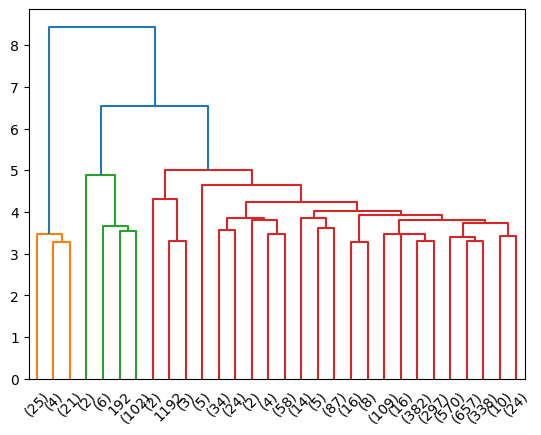

In [29]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [30]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.8205786054805961)

In [31]:
cluster_labels = fcluster(data_link, t=5.5, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.45465956961053805)

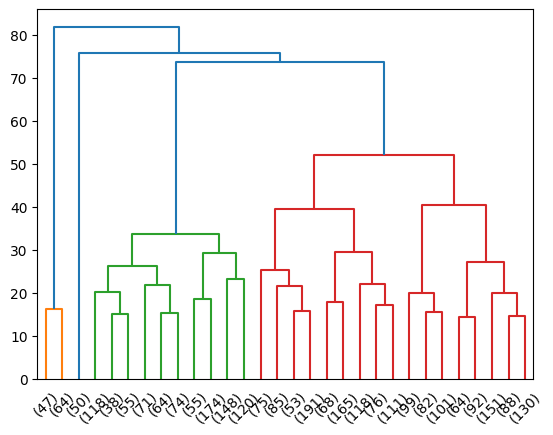

In [32]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [33]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.4938879005903758)

In [34]:
cluster_labels = fcluster(data_link, t=75, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.45465956961053805)